In [1]:
import cv2
import matplotlib.pyplot as plt
import shutil
import glob as glob
import os

from tqdm.auto import tqdm

/home/kan/anaconda3/envs/sim-med/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ROOT_DATA_DIR = '../input/xray-dataset'
# xray-dataset-processed

## Visualize a Few Images

In [3]:
def visualize_images(root_data_path):
    plt.figure(figsize=(15, 12))
    all_data_folders = glob.glob(f"{ROOT_DATA_DIR}/*")
    for data_folder in all_data_folders:
        for i in range(len(all_data_folders)):
            all_images = glob.glob(f"{all_data_folders[i]}/*")
            for image_path in all_images:
                # Read using OpenCV in BGR format.
                image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
                image = cv2.resize(image, (224, 224))
                # Convert to RGB format
                plt.subplot(2, 3, i+1)
                plt.imshow(image, cmap='gray')
                plt.title(all_data_folders[i].split('/')[-1])
                break
    plt.show()

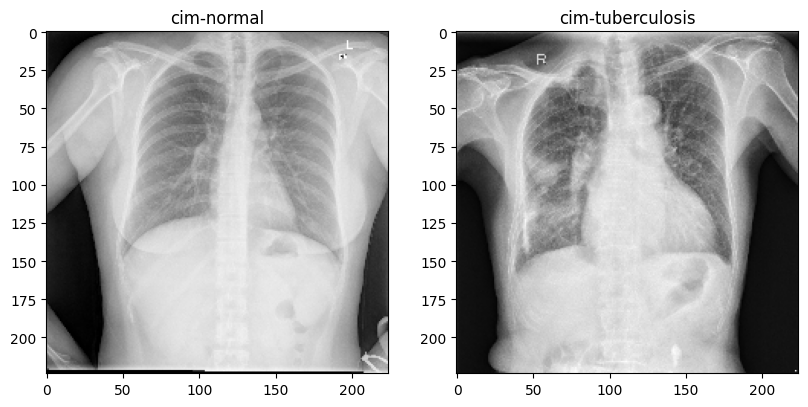

In [4]:
visualize_images(ROOT_DATA_DIR)

## Split the Dataset into Train, Validation, and Test Folder

In [5]:
TRAIN_RATIO = 0.7
VALID_RATIO = 0.2
TEST_RATIO = 0.1

In [6]:
os.makedirs(
        f"../input/xray-dataset-processed/train",
        exist_ok=True
    )
os.makedirs(
        f"../input/xray-dataset-processed/valid",
        exist_ok=True
    )
os.makedirs(
        f"../input/xray-dataset-processed/test",
        exist_ok=True
    )

In [7]:
all_data_folders = glob.glob(f"{ROOT_DATA_DIR}/*")

In [8]:
print(all_data_folders)

['../input/xray-dataset/cim-normal', '../input/xray-dataset/cim-tuberculosis']


In [9]:
for data_folder in all_data_folders:
    all_images = glob.glob(f"{data_folder}/*")
    all_images.sort()
    class_name = data_folder.split(os.path.sep)[-1]
    print(f"{class_name}: {len(all_images)} images")
    train_images = int(TRAIN_RATIO * (len(all_images)))
    valid_images = int(VALID_RATIO * (len(all_images)))
    test_images = int(TEST_RATIO * len(all_images))
    print(
        f"Num train images: {train_images},",
        f"Num valid images: {valid_images},",
        f"Num test images: {test_images},",
    )
    
    # Process and save training images.
    os.makedirs(
        f"../input/xray-dataset-processed/train/{class_name}",
        exist_ok=True
    )
    for i, image_path in tqdm(
        enumerate(all_images[:train_images]), 
        total=train_images
    ):
        image_name = image_path.split(os.path.sep)[-1]
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        cv2.imwrite(
            f"../input/xray-dataset-processed/train/{class_name}/{image_name}",
            image
        )
        
    # Process and save validation images.
    os.makedirs(
        f"../input/xray-dataset-processed/valid/{class_name}",
        exist_ok=True
    )
    for i, image_path in tqdm(
        enumerate(all_images[train_images: train_images+valid_images]), 
        total=valid_images
    ):
        image_name = image_path.split(os.path.sep)[-1]
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        cv2.imwrite(
            f"../input/xray-dataset-processed/valid/{class_name}/{image_name}",
            image
        )
        
    # Process and save test images.
    os.makedirs(
        f"../input/xray-dataset-processed/test/{class_name}",
        exist_ok=True
    )
    for i, image_path in tqdm(
        enumerate(all_images[train_images+valid_images: train_images+valid_images+test_images]), 
        total=test_images
    ):
        image_name = image_path.split(os.path.sep)[-1]
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        cv2.imwrite(
            f"../input/xray-dataset-processed/test/{class_name}/{image_name}",
            image
        )

cim-normal: 483 images
Num train images: 338, Num valid images: 96, Num test images: 48,


100%|██████████████████████████████████████████| 48/48 [00:00<00:00, 67.00it/s]


cim-tuberculosis: 462 images
Num train images: 323, Num valid images: 92, Num test images: 46,


100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 51.86it/s]
